In [1]:
%matplotlib inline

from d2l import tensorflow as d2l

In [2]:
from xinet.utils import plt, set_figsize
from xinet import tensorflow as xinet

np = xinet.np

In [3]:
from tensorflow import constant

true_w = constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([-0.24636783  0.87292844], shape=(2,), dtype=float32) 
label: tf.Tensor([0.72652686], shape=(1,), dtype=float32)


In [5]:
from xinet.utils import plt, set_figsize

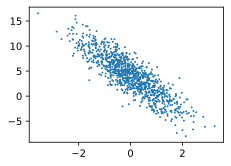

In [6]:
set_figsize()
plt.scatter(features[:, (1)], labels, 1);

In [7]:
batch_size = 10
data_iter = xinet.load_array((features, labels), batch_size)

In [8]:
import tensorflow as tf
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [9]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return np.dot(X, w) + b

In [10]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [11]:
def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [12]:
from xinet.utils import plot

In [13]:
np.sqrt

<module 'tensorflow.experimental.numpy' from 'C:\\Users\\xinet\\.conda\\envs\\TensorFlow\\lib\\site-packages\\tensorflow\\_api\\v2\\experimental\\numpy\\__init__.py'>

In [14]:
def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

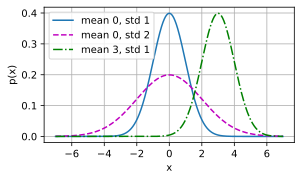

In [15]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

<module 'xinet.tensorflow' from 'D:\\actions\\atom\\xinet\\tensorflow.py'>